In [1]:
# Доступные решатели:
# _neos              [-] внутренняя ошибка связанная с работой со строками
# _mock_cbc          [-] попытка доступа к несуществующему полю _problem_files у ConcreteModel
# glpk               [+] 
# _glpk_shell        [+] 
# _mock_glpk         [-] внутренняя ошибка
# _mock_cplex        [-] внутренняя ошибка
# gurobi_direct      [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# gurobi             [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# _gurobi_shell      [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# baron              [-] внутренняя ошибка
# xpress             [+] 
# ipopt              [- +] работает, но ответ не формируется с целыми значениями
# gurobi_persistent  [-] требует предварительный вызов метода set_instance
# gams               [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# _gams_shell        [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# xpress_direct      [+] 
# xpress_persistent  [+] требует предварительный вызов метода set_instance
# mpec_nlp           [- +] работает, но ответ не формируется с целыми значениями
# mpec_minlp         [+] 
# appsi_gurobi       [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# gdpopt             [-] требуется дополнительное указание алгоритма через аргумент метода solve         
# gdpopt.gloa        [-] внутренняя ошибка
# gdpopt.lbb         [-] внутренняя ошибка
# gdpopt.loa         [-] внутренняя ошибка
# gdpopt.ric         [-] внутренняя ошибка
# gdpopt.enumerate   [-] при обработке модели в 1000 параметров появляется ошибка лицензии
# mindtpy            [-] внутренняя ошибка
# mindtpy.oa         [-] внутренняя ошибка
# mindtpy.ecp        [-] при обработке модели в 1000 параметров появляется внутренняя ошибка
# mindtpy.goa        [-] внутренняя ошибка
# mindtpy.fp         [-] внутренняя ошибка
# multistart         [- +] работает, но ответ не формируется с целыми значениями
# ipopt_v2           [- +] работает, но ответ не формируется с целыми значениями
# gurobi_v2          [-] при обработке модели в 1000 параметров появляется внутренняя ошибка
# gurobi_direct_v2   [-] ошибка разрешения зависимостей
# trustregion        [-] для инициализации требуется дополнительный аргумент degrees_of_freedom_variables
# ampl               [-] внутренняя ошибка работы решателя
# cbc                [-] при обработке модели в 1000 параметров появляется внутренняя ошибка
# conopt             [-] допустима обработка модели до 300 параметров
# copt               [-] допустима обработка модели до 500 параметров
# CPLEX              [-] допустима обработка модели до 500 параметров
# gurobiasl          [-] допустима обработка модели до 500 параметров
# ilogcp             [+]
# knitro             [-] допустима обработка модели до 10 параметров
# loqo               [-] допустима обработка модели до 500 параметров
# minos              [-] допустима обработка модели до 300 параметров

In [2]:
# Решатели, который могут работать с 1000+ параметров в модели:
# glpk, xpress, mpec_minlp, ilogcp

In [3]:
from generator_d import GeneratorD
from generator_e import GeneratorE
from generator_p import GeneratorP
from generator_t import GeneratorT
from model_builder import ModelBuilder
from solve_action import SolveAction

In [4]:
from ipywidgets import IntProgress
from IPython.display import display

In [5]:
import xpress
inited = xpress.init('/Users/dambr/venv/lib/python3.12/site-packages/xpress/license/community-xpauth.xpr')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
M = 10**6

In [8]:
# 100: e = 2 n = 10 m = 2 k = 10, c = 202
# 200: e = 2 n = 20 m = 2 k = 20, c = 402
# 300: e = 2 n = 30 m = 2 k = 30, c = 602
# 400: e = 2 n = 40 m = 2 k = 40, c = 802
# 500: e = 2 n = 50 m = 2 k = 50, c = 1002
# 600: e = 5 n = 60 m = 5 k = 60, c = 1202
# 700: e = 2 n = 70 m = 2 k = 70, c = 1402
# 800: e = 2 n = 80 m = 2 k = 80, c = 1602
# 900: e = 2 n = 90 m = 2 k = 90, c = 1802
# 1000: e = 2 n = 100 m = 2 k = 100, c = 2002
def create_model(var_count):
    params_for_var_count = {
        100:  {'e': 2, 'n': 10,  'm': 2, 'k': 10},
        200:  {'e': 2, 'n': 20,  'm': 2, 'k': 20},
        300:  {'e': 2, 'n': 30,  'm': 2, 'k': 30},
        400:  {'e': 2, 'n': 40,  'm': 2, 'k': 40},
        500:  {'e': 2, 'n': 50,  'm': 2, 'k': 50},
        600:  {'e': 2, 'n': 60,  'm': 2, 'k': 60},
        700:  {'e': 2, 'n': 70,  'm': 2, 'k': 70},
        800:  {'e': 2, 'n': 80,  'm': 2, 'k': 80},
        900:  {'e': 2, 'n': 90,  'm': 2, 'k': 90},
        1000: {'e': 2, 'n': 100, 'm': 2, 'k': 100},
        1100: {'e': 2, 'n': 110, 'm': 2, 'k': 110},
        1200: {'e': 2, 'n': 120, 'm': 2, 'k': 120},
        1300: {'e': 2, 'n': 130, 'm': 2, 'k': 130},
        1400: {'e': 2, 'n': 140, 'm': 2, 'k': 140},
        1500: {'e': 2, 'n': 150, 'm': 2, 'k': 150},
        1600: {'e': 2, 'n': 160, 'm': 2, 'k': 160},
        1700: {'e': 2, 'n': 170, 'm': 2, 'k': 170},
        1800: {'e': 2, 'n': 180, 'm': 2, 'k': 180},
        1900: {'e': 2, 'n': 190, 'm': 2, 'k': 190},
        2000: {'e': 2, 'n': 200, 'm': 2, 'k': 200}
    }
    
    params = params_for_var_count[var_count]
    e = params['e']
    n = params['n']
    m = params['m']
    k = params['k']
    
    generator_t = GeneratorT(n, m, 1, 1)
    generator_d = GeneratorD(m, 0, 0)
    generator_p = GeneratorP(n, 1, 1)
    generator_e = GeneratorE(e, n, 1, 1)
    
    T = generator_t.generate()
    D = generator_d.generate()
    P = generator_p.generate()
    E = generator_e.generate()
    
    model_builder = ModelBuilder(M, k, T, D, P, E)
    model = model_builder.build()
    
    return model

In [9]:
def calculate_durations(model, solver_name):
    count = 100
    variables = len(model.A) + len(model.f)
    constraints = len(model.constraints)
    solver = SolveAction(model, solver_name)
    description = str(variables) + ' : ' + str(constraints)
    progress = IntProgress(min=0, max=count, value=0, description=description, bar_style='success')
    display(progress)
    durations = []
    for i in range(count):
        solution = solver.solve()
        duration = solution.duration
        durations.append(duration)
        progress.value += 1
    return durations

In [10]:
def save_dataset(models, solver_name):
    data = {}
    keys = models.keys()
    for key in keys:
        data[key] = calculate_durations(models[key], solver_name)
    df = pd.DataFrame(data)
    df.to_csv(solver_name + '.csv', index=False)

In [11]:
def draw_violinplot(solver_name):
    df = pd.read_csv(solver_name + '.csv')
    df_melted = pd.melt(df)
    colums_count = len(df.columns)
    title = 'Solver: ' + solver_name
    sns.violinplot(x='variable', y='value', data=df_melted, width=1, dodge=False, hue='variable').set(title=title)
    plt.xlabel('Number of variables in the model')
    plt.ylabel('Time to solve the optimization problem (sec)')

In [12]:
models = {}
for key in range(100, 1000 + 1, 100):
    models[key] = create_model(key)

In [13]:
# save_dataset(models, 'glpk')

In [14]:
# save_dataset(models, 'xpress')

In [15]:
# save_dataset(models, 'mpec_minlp')

In [16]:
# save_dataset(models, 'ilogcp')

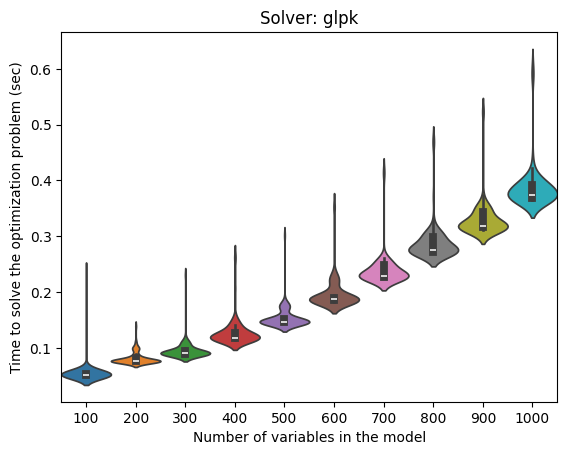

In [17]:
draw_violinplot('glpk')

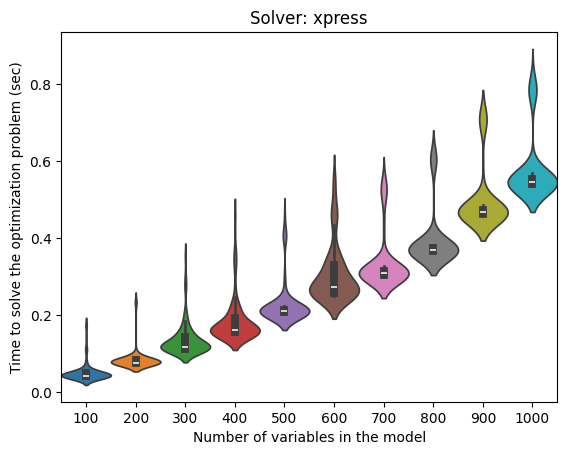

In [18]:
draw_violinplot('xpress')

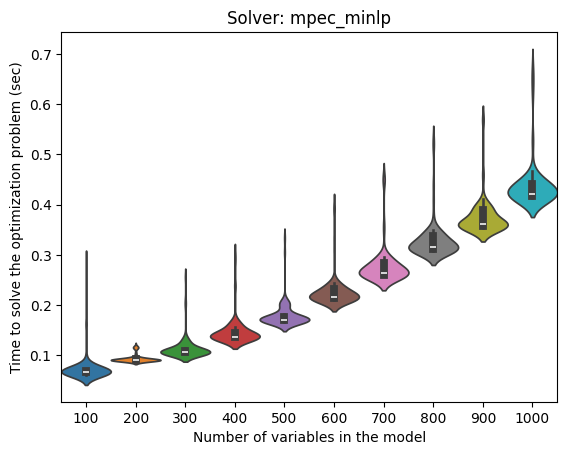

In [19]:
draw_violinplot('mpec_minlp')

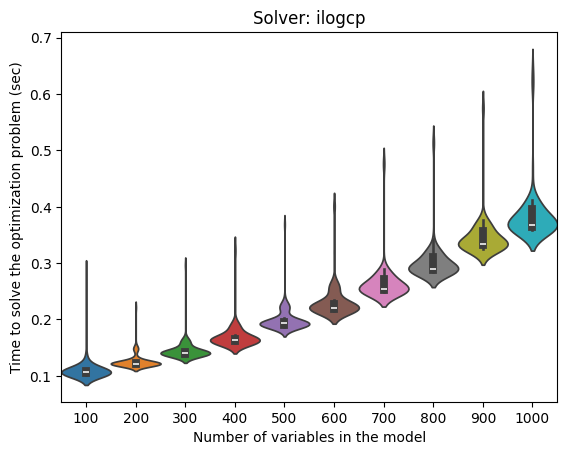

In [20]:
draw_violinplot('ilogcp')